/tmp/ipykernel_18328/2710562375.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=keyword_counts[:10].index, x=keyword_counts[:10].values, palette=custom_palette)
/tmp/ipykernel_18328/2710562375.py:42: UserWarning: The palette list has more values (5) than needed (3), which may not be intended.
  sns.barplot(y=keyword_counts[:10].index, x=keyword_counts[:10].values, palette=custom_palette)


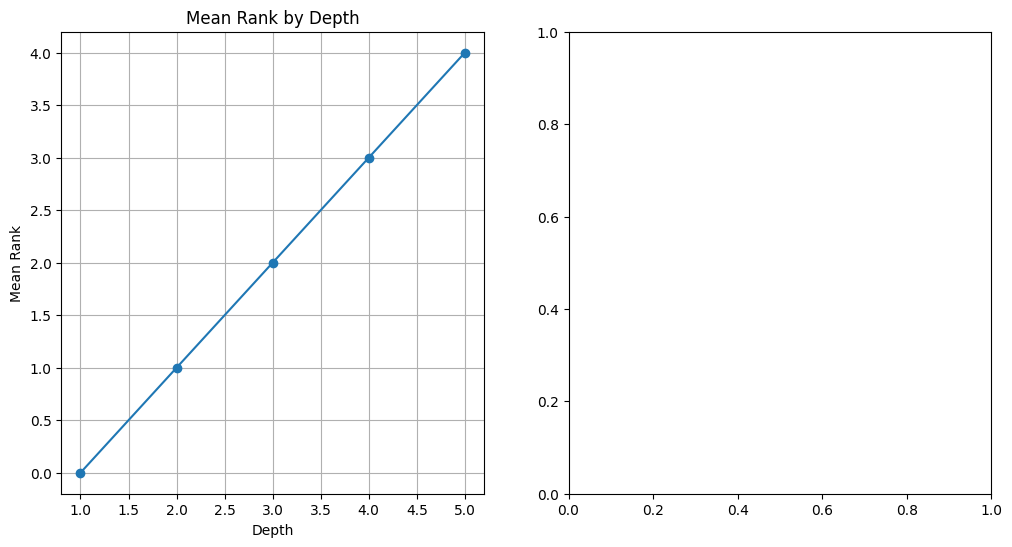

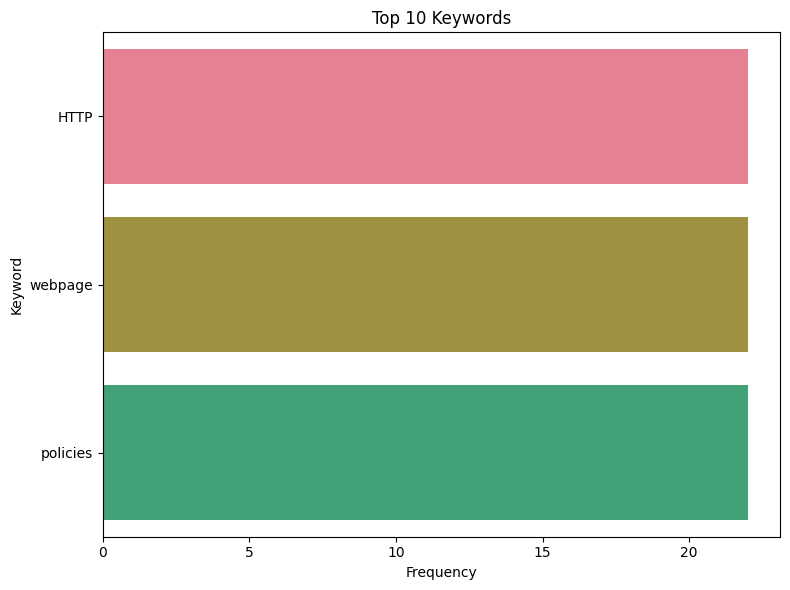

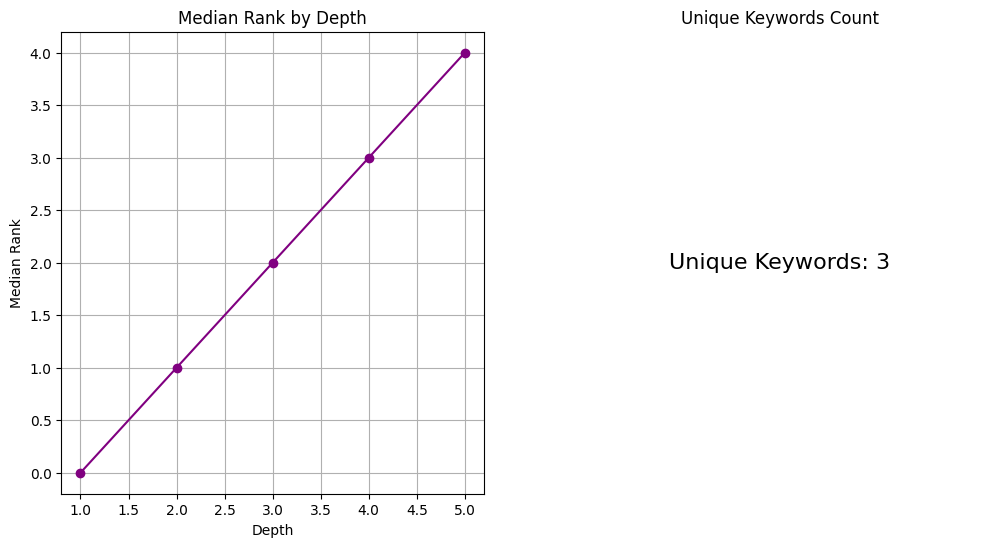

In [1]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Connect to the database
conn = sqlite3.connect("webcrawler.db")

# Retrieve data from the database
query = "SELECT rank, depth, keywords FROM weblink"
df = pd.read_sql_query(query, conn)

# Close the database connection
conn.close()

# Data Analysis

# Calculate the mean rank by depth
mean_rank_by_depth = df.groupby('depth')['rank'].mean()

# Extract and count keywords
all_keywords = ', '.join(df['keywords']).split(', ')
keyword_counts = pd.Series(all_keywords).str.strip().value_counts()

# Data Visualization

# Set a custom color palette for visualizations
custom_palette = sns.color_palette("husl", n_colors=len(mean_rank_by_depth))

# Visualize the mean rank by depth using Matplotlib
plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.plot(mean_rank_by_depth.index, mean_rank_by_depth.values, marker='o')
plt.title('Mean Rank by Depth')
plt.xlabel('Depth')
plt.ylabel('Mean Rank')
plt.grid(True)

# Visualize keyword frequencies using Seaborn
plt.subplot(122)
plt.figure(figsize=(8, 6))
sns.barplot(y=keyword_counts[:10].index, x=keyword_counts[:10].values, palette=custom_palette)
plt.title('Top 10 Keywords')
plt.xlabel('Frequency')
plt.ylabel('Keyword')

plt.tight_layout()

# Additional Analysis

# 3. Calculate the median rank by depth
median_rank_by_depth = df.groupby('depth')['rank'].median()

# 4. Calculate the total count of unique keywords
unique_keyword_count = len(keyword_counts)

# Visualize the median rank by depth and unique keyword count
plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.plot(median_rank_by_depth.index, median_rank_by_depth.values, marker='o', color='purple')
plt.title('Median Rank by Depth')
plt.xlabel('Depth')
plt.ylabel('Median Rank')
plt.grid(True)

plt.subplot(122)
plt.text(0.5, 0.5, f'Unique Keywords: {unique_keyword_count}', fontsize=16, ha='center', va='center')
plt.axis('off')
plt.title('Unique Keywords Count')

plt.show()
